# Python Pandas Merge Sort Filter

## TASKS

- Read the data into a Pandas DataFrame.

- Use a Filter to remove outliers in the data.

- Combine the data using Pandas Merge.

- Sort the data by rainfall and temperature.

- Use the Seaborn package to create a regression plot.

### Importing

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [19]:
df_temp = pd.read_csv(r'C:\Users\ARSALAN\Desktop\CR PROJECTS\Python Pandas Merge Sort Filter\tempYearly.csv')
df_rain = pd.read_csv(r'C:\Users\ARSALAN\Desktop\CR PROJECTS\Python Pandas Merge Sort Filter\rainYearly.csv')

### Display data loaded 

In [20]:
display(df_temp)
display(df_rain)

,Year,Temperature
0,1956,16.99
1,1957,10.34
2,1958,21.01
3,1959,23.68
4,1960,24.59
...,...,...
57,2013,26.41
58,2014,11.24
59,2015,48.27
60,2016,20.29


,Year,Rainfall
0,1956,1.01
1,1957,1.66
2,1958,3.50
3,1959,3.31
4,1960,3.61
...,...,...
56,2013,1.50
57,2014,1.76
58,2015,6.73
59,2016,3.21


### Scatter plot ( temp )

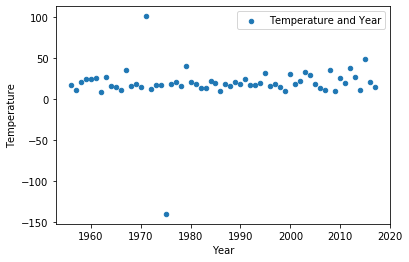

In [21]:
df_temp.plot.scatter( x = 'Year',
                      y = 'Temperature',
                      label = 'Temperature and Year')
plt.show()

- **These "too far away" points are called "outliers", because they "lie outside" the range in which we expect them.**

### Scatter plot ( rain )

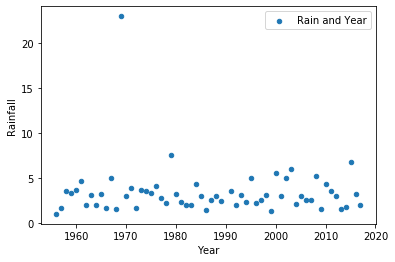

In [22]:
df_rain.plot.scatter( x = 'Year',
                      y = 'Rainfall',
                      label = 'Rain and Year')
plt.show()

### Use a Filter to remove outliers in the temp data

In [23]:
df_temp_filter = df_temp.query('Temperature < 40 & Temperature > 0')
display(df_temp_filter.head())

,Year,Temperature
0,1956,16.99
1,1957,10.34
2,1958,21.01
3,1959,23.68
4,1960,24.59


### Plotting filtered temp data

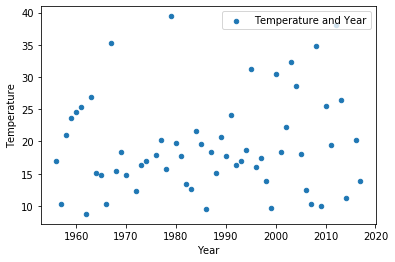

In [24]:
df_temp_filter.plot.scatter( x = 'Year',
                      y = 'Temperature',
                      label = 'Temperature and Year')
plt.show()

### Use a Filter to remove outliers in the rain data 

In [25]:
df_rain_filter = df_rain.query('Rainfall < 6 & Rainfall > 0')
display(df_rain_filter.head())

,Year,Rainfall
0,1956,1.01
1,1957,1.66
2,1958,3.50
3,1959,3.31
4,1960,3.61


### Plotting filtered rain data

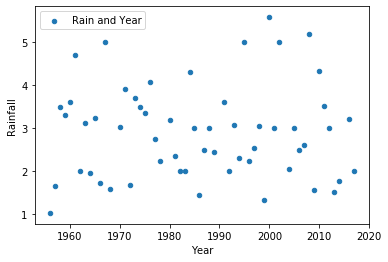

In [26]:
df_rain_filter.plot.scatter( x = 'Year',
                             y = 'Rainfall',
                             label = 'Rain and Year')
plt.show()

### Combine the data using Pandas Merge

**how** {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’
Type of merge to be performed.

- left: use only keys from left frame, similar to a SQL left outer join; preserve key order.

- right: use only keys from right frame, similar to a SQL right outer join; preserve key order.

- outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.

- inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

**on** {label or list}:

Column or index level names to join on. These must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.

In [32]:
df_merge = pd.merge( df_temp_filter , df_rain_filter , on = 'Year' , how = 'outer') # inner -> missing values neglected
display(df_merge)                                                                   # outer -> missing values also considered
df_merge.info()

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61
...,...,...,...
56,2014,11.24,1.76
57,2016,20.29,3.21
58,2017,13.81,2.00
59,1971,NaN,3.92


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         61 non-null     int64  
 1   Temperature  59 non-null     float64
 2   Rainfall     57 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [33]:
df_merge = pd.merge( df_temp_filter , df_rain_filter , on = 'Year' , how = 'inner') # inner -> missing values neglected
display(df_merge)                                                                   # outer -> missing values also considered
df_merge.info()

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61
5,1961,25.29,4.71
6,1962,8.77,2.00
7,1963,26.88,3.12
8,1964,15.04,1.96
9,1965,14.78,3.23


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         55 non-null     int64  
 1   Temperature  55 non-null     float64
 2   Rainfall     55 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


### Sorting Data by rainfall and temerature

In [35]:
df_merge_sorted = df_merge.sort_values(by = 'Temperature')
df_merge_sorted

,Year,Temperature,Rainfall
6,1962,8.77,2.00
26,1986,9.55,1.45
38,1999,9.68,1.32
47,2009,9.94,1.56
10,1966,10.27,1.71
45,2007,10.29,2.60
1,1957,10.34,1.66
52,2014,11.24,1.76
14,1972,12.33,1.67
44,2006,12.54,2.50


In [36]:
df_merge_sorted = df_merge.sort_values(by = 'Rainfall')
df_merge_sorted

,Year,Temperature,Rainfall
0,1956,16.99,1.01
38,1999,9.68,1.32
26,1986,9.55,1.45
51,2013,26.41,1.50
47,2009,9.94,1.56
12,1968,15.42,1.57
1,1957,10.34,1.66
14,1972,12.33,1.67
10,1966,10.27,1.71
52,2014,11.24,1.76


### descending sort ?

In [37]:
df_merge_sorted = df_merge.sort_values(by = 'Rainfall' , ascending = False)
df_merge_sorted

,Year,Temperature,Rainfall
39,2000,30.40,5.60
46,2008,34.81,5.20
11,1967,35.26,5.00
34,1995,31.27,5.00
41,2002,22.23,5.00
5,1961,25.29,4.71
48,2010,25.56,4.34
24,1984,21.70,4.30
17,1976,17.92,4.08
15,1973,16.29,3.71


### Use the Seaborn package to create a regression plot

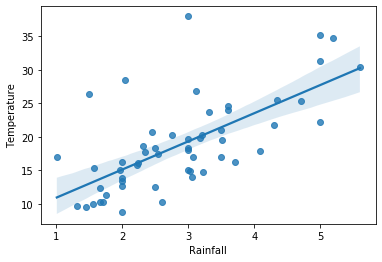

In [40]:
sns.regplot(  x = 'Rainfall', 
              y = 'Temperature',
              data = df_merge)

plt.show()